In [2]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import pandas as pd
import seaborn as sns

In [3]:
class Evaluation:
    """
    This class has different evaluation methods for the given csv.
        @:param csv_path: the path of the csv
                y_pred_col_name: the column name of the predicted column in the csv.
                model_name: the name of the model.
    """

    def __init__(self, csv_path, y_pred_col_name, model_name):
        self.model_name = model_name
        df = pd.read_csv(csv_path)
        self.y_true = df['ground_truth']
        self.y_pred = df[y_pred_col_name]

    def get_confusion_matrix(self):
        confusion_matrix = pd.crosstab(self.y_true, self.y_pred, rownames=['Actual'], colnames=['Predicted'])
        sns.heatmap(confusion_matrix, annot=True, fmt='g')
        plt.title(f"Confusion matrix {self.model_name}")
        plt.show()

    def get_f1_score(self):
        f1 = metrics.f1_score(self.y_true, self.y_pred)
        print(f"F1 Score: {f1}")

    def get_accuracy(self):
        acc = metrics.accuracy_score(self.y_true, self.y_pred)
        print(f"Accuracy Score: {acc}")

    def get_roc(self):
        fpr, tpr, _ = metrics.roc_curve(self.y_true, self.y_pred)
        auc = metrics.roc_auc_score(self.y_true, self.y_pred)
        print("AUC: ", auc)
        plt.plot(fpr, tpr)
        plt.title(f"ROC curve {self.model_name}")
        plt.xlabel("False positive rate (1-specificity)")
        plt.ylabel("True positive rate (sensitivity)")
        plt.show()

Accuracy Score: 0.8854961832061069
F1 Score: 0.7953216374269007


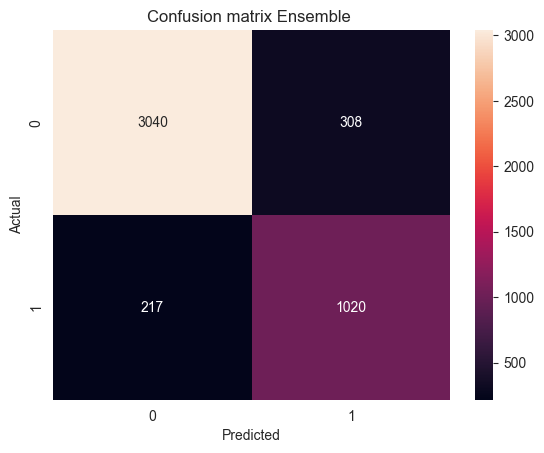

AUC:  0.8662901825339565


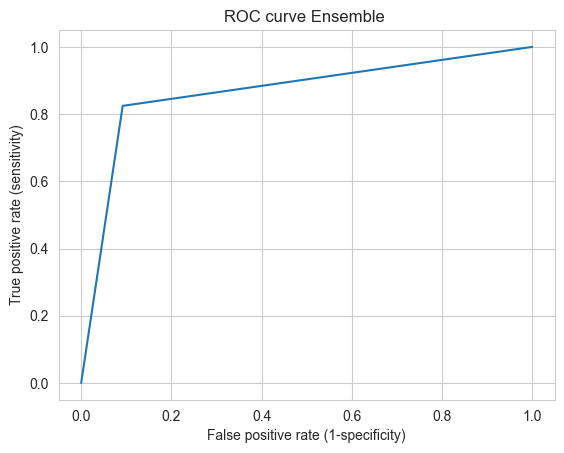

In [17]:
# Replace these 3 parameters for the desired csv and model.
csv_string = '../data/test/csv/ensemble.csv'
y_pred_col_name = 'human_detected'
model_name = "Ensemble "

eval = Evaluation(csv_path=csv_string, y_pred_col_name=y_pred_col_name, model_name=model_name)
eval.get_accuracy()
eval.get_f1_score()
eval.get_confusion_matrix()
eval.get_roc()